In [115]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

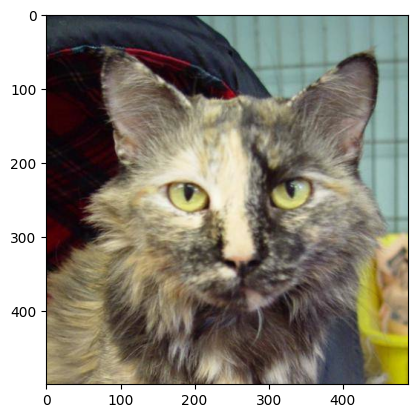

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

cat_sample = plt.imread("../data/archive/train/train/cat.10.jpg")

plt.imshow(cat_sample)

In [117]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import re
import os


raw_data_path = Path("../data/archive")
test_path = raw_data_path/"test"/"test"
train_path = raw_data_path/"train"/"train"

In [118]:
train_list = list(train_path.iterdir())

In [119]:
images = np.random.choice(train_list, 10)
pattern = r"\b\w{3}\b"
labels = [re.findall(pattern, path.name)[0] for path in images]

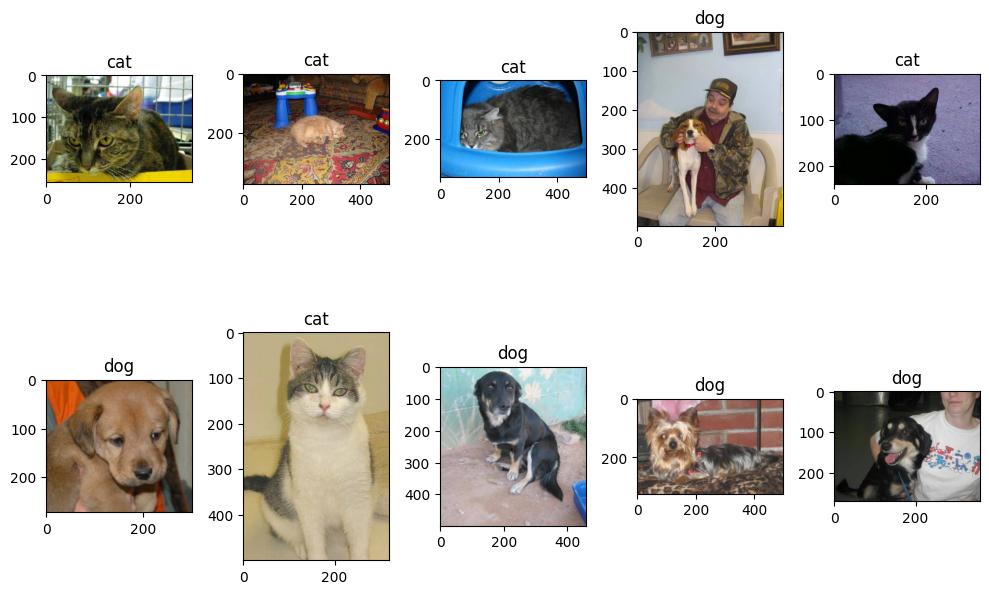

In [120]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))
for i, ax in enumerate(axes.flatten()):
    image= plt.imread(images[i])       # reads as image
    ax.imshow(image)                    # showing image
    ax.set_title(labels[i])
    
fig.tight_layout()  

In [121]:
currentPath = Path("")
currentPath

WindowsPath('.')

In [122]:
#currentPath = Path("../data/archive_filtered")


# Folders for small data
path_small= currentPath/"experiment_small_data"
path_small.mkdir(exist_ok=True)

path_small_test= path_small/"test"
path_small_test.mkdir(exist_ok=True)

path_small_train= path_small/"train"
path_small_train.mkdir(exist_ok=True)

path_small_val= path_small/"val"
path_small_val.mkdir(exist_ok=True)

# Folders for tiny data

path_tiny= currentPath/"experiment_tiny_data"
path_tiny.mkdir(exist_ok=True)

path_tiny_train= path_tiny/"train"
path_tiny_train.mkdir(exist_ok=True)

path_tiny_test= path_tiny/"test"
path_tiny_test.mkdir(exist_ok=True)

path_tiny_val= path_tiny/"val"
path_tiny_val.mkdir(exist_ok=True)

# Folders for original data

path_original = currentPath/"original_data"
path_original.mkdir(exist_ok=True)

test_original = path_original/"test"/"test"
test_original.mkdir(parents=True, exist_ok=True)

train_original = path_original/"train"/"train"
train_original.mkdir(parents=True, exist_ok=True)

In [123]:
import shutil
import stat
def clear_folder(folder_path):
    folder = Path(folder_path)
    for item in folder.iterdir():
        folder = Path(item)
        for test in folder.iterdir():
            #os.chmod(test, stat.S_IWRITE)

            if test.is_dir():
                shutil.rmtree(test)
            else:
                test.unlink()

In [124]:
clear_folder(path_small)
clear_folder(path_tiny)

In [125]:
import random

def cat_dog(image_list:list, amount:int):
    total_dogs= [dog for dog in image_list if "dog" in dog.name]
    
    total_cats= [cat for cat in image_list if "cat" in cat.name]
    
    random_numbers = random.sample(range(7501), 2500)

    train_amount = int(0.32*amount)
    train = list()
    for i in range(train_amount):
        train.append(total_dogs[random_numbers[i]])
        train.append(total_cats[random_numbers[i]])
        random_numbers.remove(random_numbers[i])
        
    val_amount = int(0.08*amount)
    val = list()
    for i in range(val_amount):
        val.append(total_dogs[random_numbers[i]])
        val.append(total_cats[random_numbers[i]])
        random_numbers.remove(random_numbers[i])
        
    test_amount = int(0.1*amount)
    test = list()
    for i in range(test_amount):
        test.append(total_dogs[random_numbers[i]])
        test.append(total_cats[random_numbers[i]])
        random_numbers.remove(random_numbers[i])
            
    return train, val, test

In [126]:
train_data_small, val_data_small, test_data_small = cat_dog(train_list, 2500)
train_data_tiny,val_data_tiny, test_data_tiny = cat_dog(train_list, 250)

In [127]:
import shutil
def image_copier(dest_path, dataset):
    if not os.listdir(dest_path):
        for path in dataset:
                shutil.copy(path, dest_path)
        
    else:
        print("The folder is not empty")

In [128]:
image_copier(path_small_test, test_data_small)
image_copier(path_small_train, train_data_small)
image_copier(path_small_val, val_data_small)

image_copier(path_tiny_test, test_data_tiny)
image_copier(path_tiny_train, train_data_tiny)
image_copier(path_tiny_val, val_data_tiny)

In [129]:
def labeler(data):
    labels = []
    images = []
    for path in data:    # setting labels 1 for dog, 0 for cat
        label = 1 if "dog" in path.name else 0
        labels.append(label)
        
        image = plt.imread(str(path))
        images.append(image)
    return images, np.array(labels)

In [130]:
test_list_small = list(path_small_test.iterdir())
train_list_small = list(path_small_train.iterdir())
val_list_small = list(path_small_val.iterdir())

test_list_tiny = list(path_tiny_test.iterdir())
train_list_tiny = list(path_tiny_train.iterdir())
val_list_tiny = list(path_tiny_val.iterdir())

In [131]:
random.shuffle(test_list_small)
random.shuffle(train_list_small)
random.shuffle(val_list_small)
random.shuffle(test_list_tiny)
random.shuffle(train_list_tiny)
random.shuffle(val_list_tiny)
X_test_small, y_test_small = labeler(test_list_small)
X_test_tiny, y_test_tiny = labeler(test_list_tiny)
X_train_small, y_train_small = labeler(train_list_small)
X_train_tiny, y_train_tiny = labeler(train_list_tiny)
X_val_small, y_val_small = labeler(val_list_small)
X_val_tiny, y_val_tiny = labeler(val_list_tiny)

In [132]:
import pandas as pd
import seaborn as sns
def plot(images, labels):
    df = pd.DataFrame({"image": images, "label": labels})
    df["count"] = df["label"].sum()
    sns.barplot(data=df, x="label", y="count", palette=["#0398fc", "orange"])

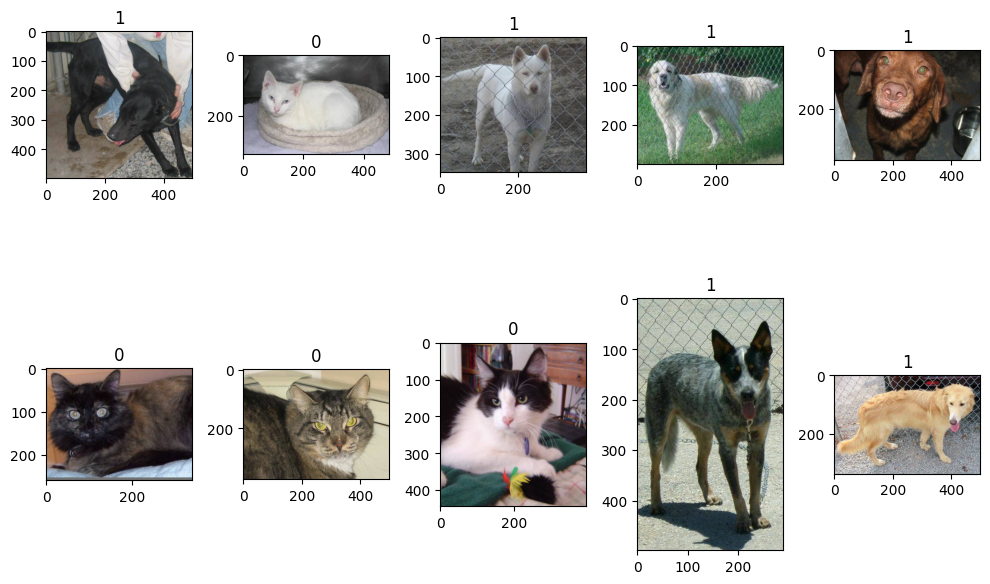

In [133]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))

for i, ax in enumerate(axes.flatten()):
    image = X_train_small[i]   
    ax.imshow(image)                   
    ax.set_title(y_train_small[i])
    
fig.tight_layout()  

C:\Users\Sammy Guru\AppData\Local\Temp\ipykernel_25252\3526214338.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="label", y="count", palette=["#0398fc", "orange"])


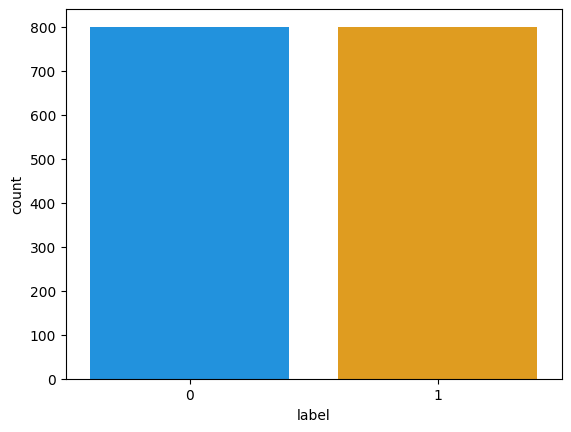

In [134]:
plot(X_train_small, y_train_small)

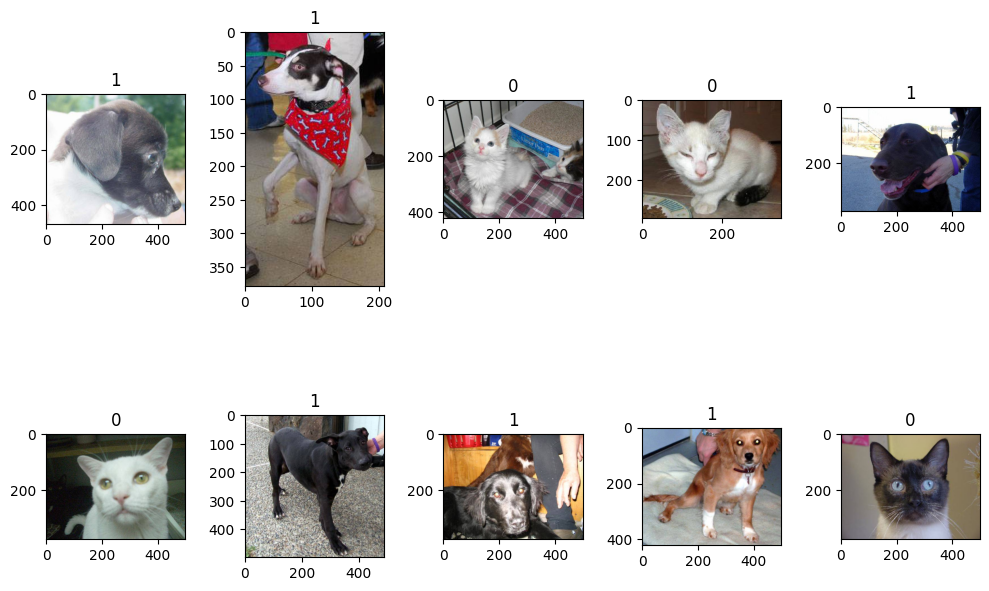

In [135]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))

for i, ax in enumerate(axes.flatten()):
    image = X_train_tiny[i]   
    ax.imshow(image)                   
    ax.set_title(y_train_tiny[i])
    
fig.tight_layout()  

C:\Users\Sammy Guru\AppData\Local\Temp\ipykernel_25252\3526214338.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="label", y="count", palette=["#0398fc", "orange"])


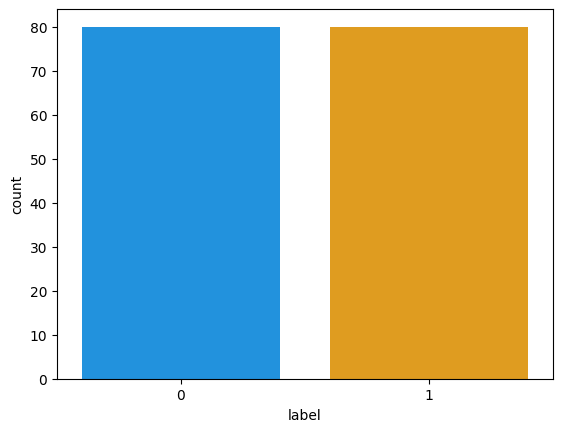

In [136]:
plot(X_train_tiny, y_train_tiny)

In [141]:
# Create a list with index for each dataset
import plotly.graph_objects as go
train_index = list(range(len(y_train_small)))

fig = go.Figure()

# Dataset
fig.add_trace(go.Scatter(x=train_index, y=y_train_small, mode='markers', name='Train'))


fig.update_layout(title='Dataset with index',
                  xaxis_title='Index',
                  yaxis_title='Label',
                  yaxis=dict(
                      tickvals=[0, 1],
                      ticktext=['Cat', 'Dog']
                  ))

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [142]:
def image_size(data):
    image_sizes = []
    
    for image in data:
        image_size = image.shape[:2]
        image_sizes.append(image_size)
    return image_sizes

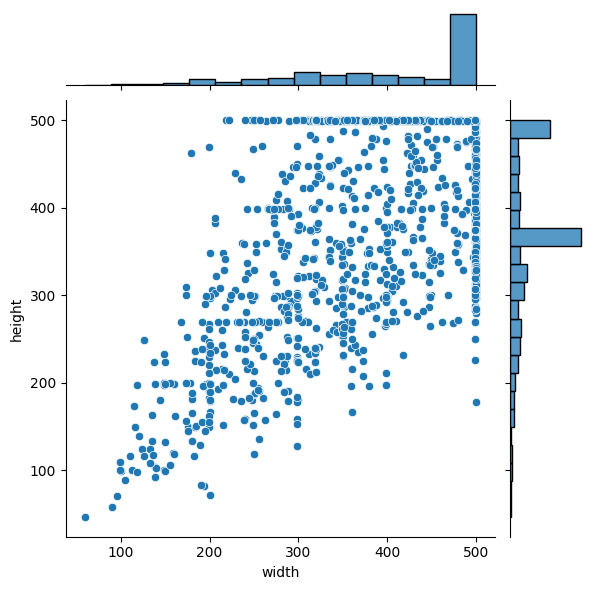

In [143]:
train_sizes_small = image_size(X_train_small)

df_train_sizes_small= pd.DataFrame( data= train_sizes_small, columns= ["height", "width"])

sns.jointplot(data = df_train_sizes_small, x = "width", y = "height")

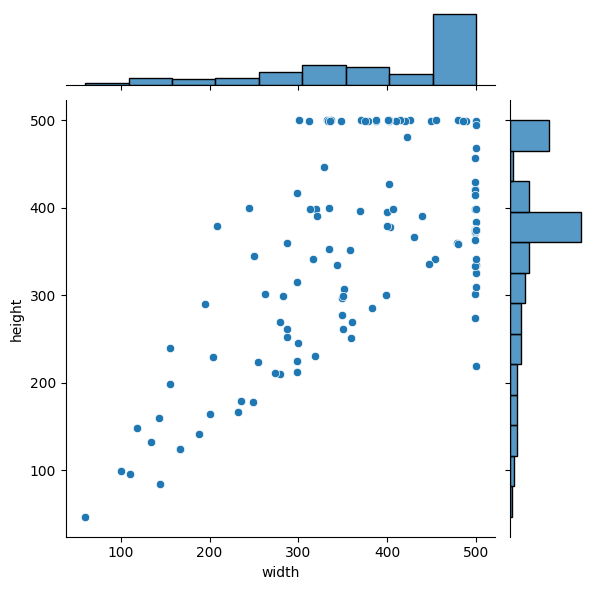

In [144]:
train_sizes_tiny = image_size(X_train_tiny)
df_train_sizes_tiny= pd.DataFrame( data= train_sizes_tiny, columns= ["height", "width"])

sns.jointplot(data = df_train_sizes_tiny, x = "width", y = "height")

In [145]:
train_sizes_small
filtered_train_sizes_small = [size for size in train_sizes_small if size[0] >= 100 and size[1] >= 100]

print(filtered_train_sizes_small)

[(499, 496), (329, 485), (348, 377), (300, 370), (375, 499), (260, 339), (375, 499), (444, 396), (499, 289), (337, 499), (374, 500), (374, 500), (500, 376), (332, 500), (225, 299), (413, 361), (326, 499), (306, 229), (300, 449), (499, 357), (350, 499), (344, 349), (375, 499), (375, 499), (159, 240), (500, 422), (415, 500), (375, 499), (499, 413), (499, 380), (353, 280), (374, 500), (299, 400), (329, 499), (239, 320), (375, 499), (374, 499), (475, 489), (317, 392), (500, 356), (262, 349), (308, 353), (298, 349), (374, 500), (500, 374), (271, 309), (199, 139), (306, 203), (343, 500), (239, 320), (375, 499), (336, 447), (447, 294), (447, 336), (419, 440), (500, 435), (313, 400), (500, 346), (374, 500), (258, 240), (186, 249), (270, 277), (348, 215), (473, 499), (375, 499), (448, 499), (443, 500), (494, 499), (374, 500), (352, 499), (373, 500), (288, 383), (299, 400), (359, 252), (500, 497), (374, 500), (320, 299), (374, 500), (418, 478), (334, 499), (448, 431), (403, 499), (226, 285), (41

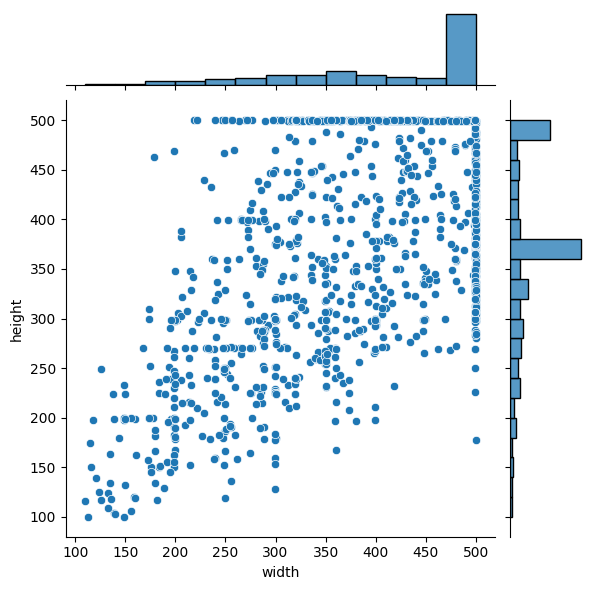

In [146]:
df_train_sizes_small= pd.DataFrame( data= filtered_train_sizes_small, columns= ["height", "width"])

sns.jointplot(data = df_train_sizes_small, x = "width", y = "height") # Plotting images based on resolution

In [147]:
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Image resizer
def prep_images(data_path):
    image_files = list(data_path.glob('*.jpg'))
    labels = []
    images = []
    
    for file in image_files:
        img = cv2.imread(str(file))
        
        if img.shape[0] > 100 and img.shape[1] > 100: # Removing images that were very large made accuracy plummet
            # Changes image size to 200x200. 200x200 gave good enough results to keep
            img = cv2.resize(img, (200, 200))   
            images.append(img)
            label = 1 if 'dog' in file.stem else 0
            labels.append(label)
        
    combined = list(zip(images, labels)) # Help from chatgpt to shuffle without losing labels
    random.shuffle(combined)
    
    shuffled_images, shuffled_labels = zip(*combined)


    images = np.array(shuffled_images)
    labels = np.array(shuffled_labels)
    
    
    return images, labels

In [148]:
# Rezising all datasets
X_train_small, y_train_small = prep_images(path_small_train)
X_train_tiny, y_train_tiny = prep_images(path_tiny_train)
X_test_small, y_test_small = prep_images(path_small_test)
X_val_small, y_val_small = prep_images(path_small_val)

In [149]:
print(X_train_small.shape)
print(X_train_small[30].shape)
print(y_test_small)

(1585, 200, 200, 3)
(200, 200, 3)
[0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0
 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0
 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1
 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1
 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1
 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0
 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1
 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1
 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0
 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0

In [150]:
print(len(X_train_small))
print(len(y_train_small))

1585
1585


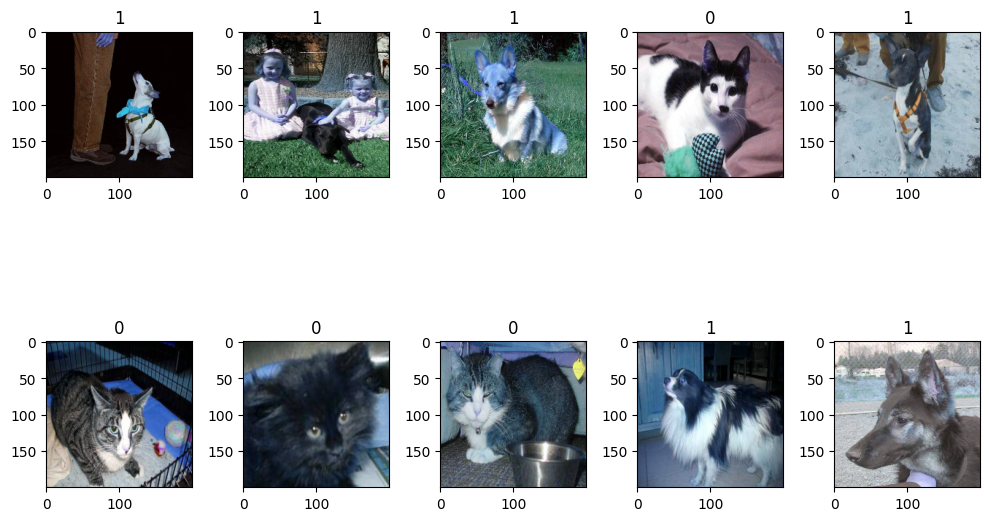

In [151]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))

for i, ax in enumerate(axes.flatten()):
    image = X_train_small[i]   
    ax.imshow(image)                   
    ax.set_title(y_train_small[i])
    
fig.tight_layout()  

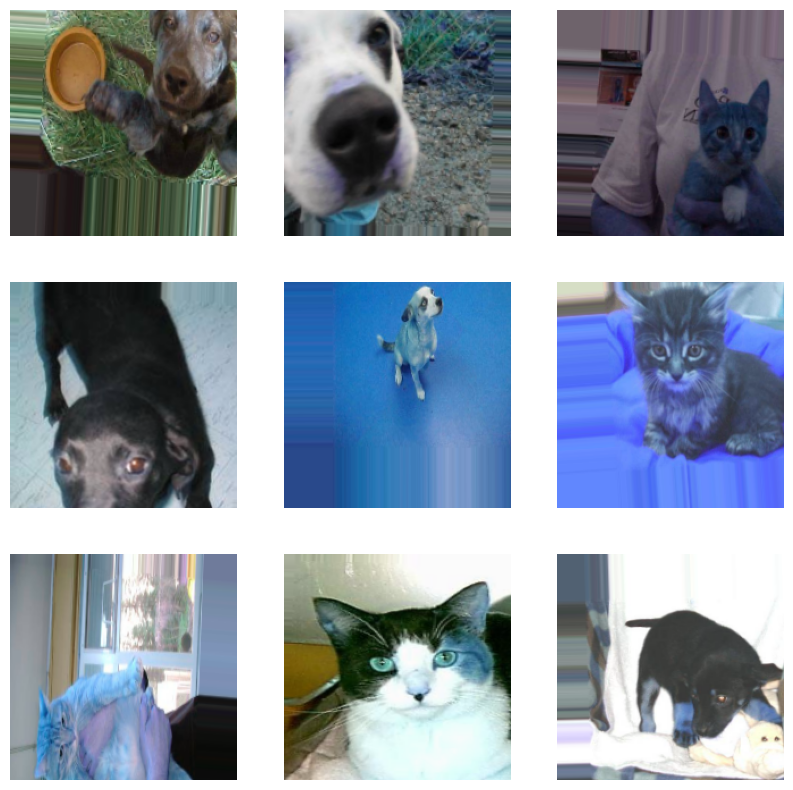

In [152]:
train_datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.25,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Creating an image generator for resized images
train_datagen.fit(X_train_small)

def visualize_augmented_images(datagen, images, num_images=9):
    plt.figure(figsize=(10, 10))
    for X_batch, _ in datagen.flow(images, np.zeros(len(images)), batch_size=num_images):
        for i in range(0, num_images):
            plt.subplot(3, 3, i + 1)
            plt.imshow(X_batch[i].astype("uint8"))
            plt.axis('off')
        break
    plt.show()

visualize_augmented_images(train_datagen, X_train_small)

In [153]:
X_train_small[1].flatten().min(), X_train_small[1].flatten().max()

(0, 255)

In [154]:
X_train_small = X_train_small.astype('float32') / 255
X_test_small = X_test_small.astype('float32') / 255
X_val_small = X_val_small.astype('float32') / 255

In [155]:
from tensorflow.keras.callbacks import EarlyStopping
def cnn_model(learning_rate=0.001, dropout_rate=0.3, kernels=[32, 64, 128, 128]):
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name='CNN_model')

    # Adding layers 
    for kernel in kernels:
        model.add(Conv2D(kernel, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(200, 200, 3) if not model.layers else None))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=2))  # subsampling layer

    model.add(Flatten())  # flatten layer
    model.add(Dropout(dropout_rate))  # dropout layer
    model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))  # fully connected layer
    model.add(Dense(1, activation='sigmoid'))  # output layer

    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])

    return model

In [156]:
model = cnn_model()
model.summary()

c:\Users\Sammy Guru\Documents\github\AI-Samir-Ibrahim-OPA23\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 21, 21, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,795,457 (25.92 MB)

 Trainable params: 6,795,457 (25.92 MB)

 Non-trainable params: 0 (0.00 B)

In [157]:
print(len(X_val_small))
print(len(y_val_small))

397
397


In [158]:
history = model.fit(X_train_small, y_train_small, epochs=10, validation_data=(X_val_small, y_val_small), batch_size=32)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - acc: 0.4834 - loss: 2.2926 - val_acc: 0.5264 - val_loss: 0.6920
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 941ms/step - acc: 0.5095 - loss: 0.6952 - val_acc: 0.5340 - val_loss: 0.6919
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 911ms/step - acc: 0.5256 - loss: 0.6925 - val_acc: 0.4786 - val_loss: 0.6931
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 895ms/step - acc: 0.5703 - loss: 0.6906 - val_acc: 0.4962 - val_loss: 0.6884
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 906ms/step - acc: 0.5332 - loss: 0.6823 - val_acc: 0.5441 - val_loss: 0.6731
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 984ms/step - acc: 0.5883 - loss: 0.6536 - val_acc: 0.5592 - val_loss: 0.6706
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - acc: 0.5959 - loss: 0.6591 - val_acc: 0.5869 - val_loss: 0.6796
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 934ms/step - acc: 0.6196 - loss: 0.6491 - val_acc: 0.5995 - val_loss: 0.6863
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 48s 967ms/step -

In [159]:
metrics = pd.DataFrame(history.history)
metrics.head()

,acc,loss,val_acc,val_loss
0,0.495899,1.175504,0.526448,0.692019
1,0.508517,0.695794,0.534005,0.691866
2,0.499054,0.694590,0.478589,0.693064
3,0.564038,0.690262,0.496222,0.688360
4,0.550158,0.679813,0.544081,0.673091


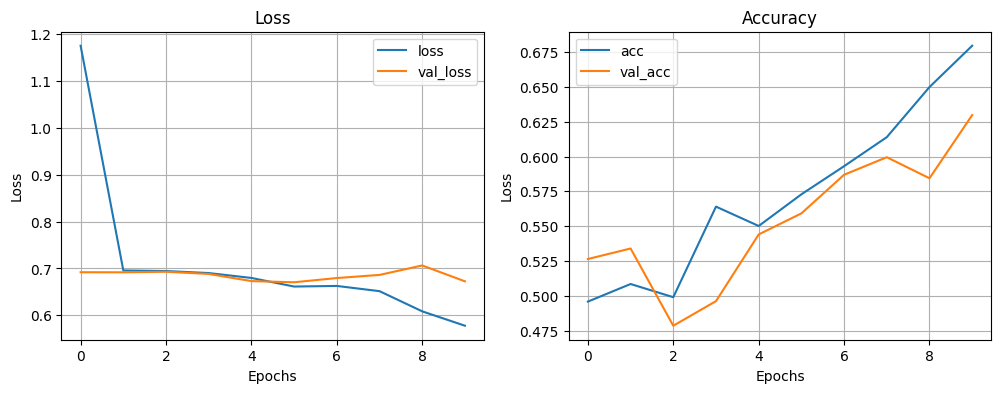

In [160]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="Loss")

plot_metrics(metrics)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 245ms/step


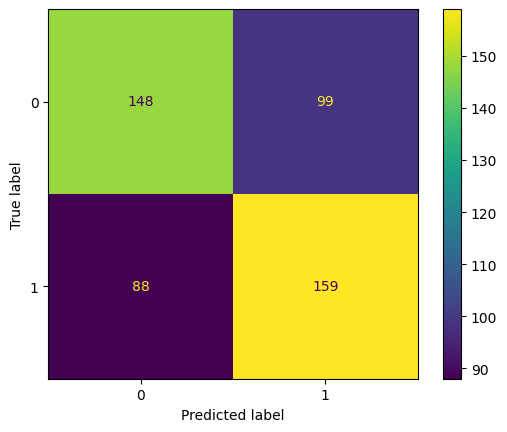

              precision    recall  f1-score   support

     Class 0       0.63      0.60      0.61       247
     Class 1       0.62      0.64      0.63       247

    accuracy                           0.62       494
   macro avg       0.62      0.62      0.62       494
weighted avg       0.62      0.62      0.62       494



In [161]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred_prob = model.predict(X_test_small)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_small, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

# Create classification report 
class_report = classification_report(y_test_small, y_pred, target_names=['Class 0', 'Class 1'])
print(class_report)

In [162]:
train_generator = train_datagen.flow(X_train_small, y_train_small, batch_size=32)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Early stopper with low tolerence because low epochs
early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=4,
    verbose=1,
    restore_best_weights=True
)
# Training model with data augmentation
history.model.fit(
    train_generator,
    epochs=10,
    validation_data=(X_val_small, y_val_small),
    callbacks=[early_stopper]
)

Epoch 1/10


c:\Users\Sammy Guru\Documents\github\AI-Samir-Ibrahim-OPA23\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - acc: 0.5478 - loss: 0.7052 - val_acc: 0.6373 - val_loss: 0.6411
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - acc: 0.5818 - loss: 0.6738 - val_acc: 0.6297 - val_loss: 0.6296
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - acc: 0.5907 - loss: 0.6674 - val_acc: 0.6322 - val_loss: 0.6580
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - acc: 0.5525 - loss: 0.6870 - val_acc: 0.5995 - val_loss: 0.6176
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - acc: 0.6170 - loss: 0.6552 - val_acc: 0.6952 - val_loss: 0.6083
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - acc: 0.6051 - loss: 0.6651 - val_acc: 0.6700 - val_loss: 0.6301
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - acc: 0.6183 - loss: 0.6486 - val_acc: 0.6524 - val_loss: 0.5681
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - acc: 0.6372 - loss: 0.6365 - val_acc: 0.6146 - val_loss: 0.6043
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - acc: 0.6730 - loss: 0.6129 - va

In [163]:
metrics = pd.DataFrame(history.history)
metrics.head()

,acc,loss,val_acc,val_loss
0,0.495899,1.175504,0.526448,0.692019
1,0.508517,0.695794,0.534005,0.691866
2,0.499054,0.694590,0.478589,0.693064
3,0.564038,0.690262,0.496222,0.688360
4,0.550158,0.679813,0.544081,0.673091


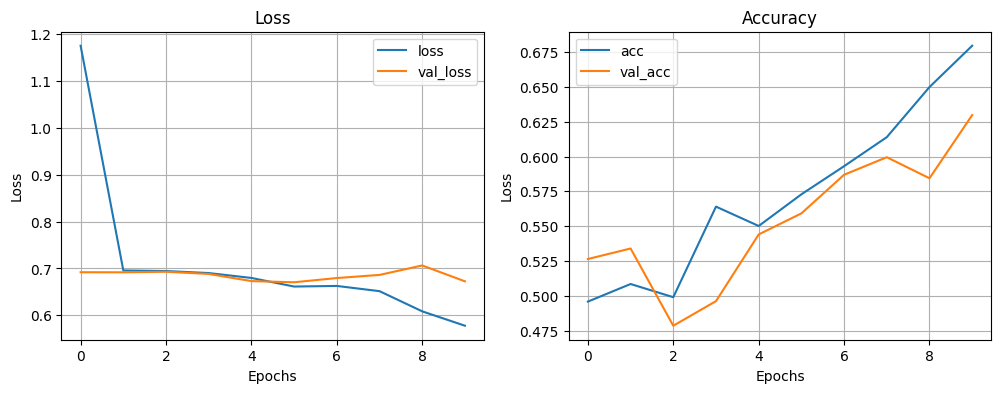

In [164]:
def plot_metrics(metrics): 
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="Loss")

plot_metrics(metrics)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 240ms/step


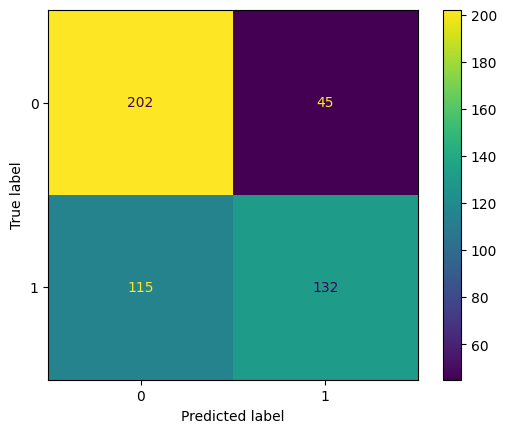

              precision    recall  f1-score   support

     Class 0       0.64      0.82      0.72       247
     Class 1       0.75      0.53      0.62       247

    accuracy                           0.68       494
   macro avg       0.69      0.68      0.67       494
weighted avg       0.69      0.68      0.67       494



In [165]:
y_pred_prob = model.predict(X_test_small)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_small, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

# Create classification report 
class_report = classification_report(y_test_small, y_pred, target_names=['Class 0', 'Class 1'])
print(class_report)

In [166]:
from tensorflow.keras.applications import Xception

base_model = Xception(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze wieghts of the Xception base model
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])

# Compile Model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

In [168]:
history = model.fit(X_train_small, y_train_small, epochs=10, validation_data=(X_val_small, y_val_small))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - acc: 0.9646 - loss: 0.1017 - val_acc: 0.9723 - val_loss: 0.0645
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - acc: 0.9823 - loss: 0.0454 - val_acc: 0.9798 - val_loss: 0.0377
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - acc: 0.9822 - loss: 0.0445 - val_acc: 0.9849 - val_loss: 0.0451
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 180s 4s/step - acc: 0.9861 - loss: 0.0346 - val_acc: 0.9824 - val_loss: 0.0471
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - acc: 0.9929 - loss: 0.0224 - val_acc: 0.9849 - val_loss: 0.0398
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - acc: 0.9866 - loss: 0.0294 - val_acc: 0.9773 - val_loss: 0.0558
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - acc: 0.9917 - loss: 0.0229 - val_acc: 0.9849 - val_loss: 0.0483
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 454s 9s/step - acc: 0.9927 - loss: 0.0193 - val_acc: 0.9798 - val_loss: 0.0654
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - acc: 0.9956

In [169]:
metrics = pd.DataFrame(history.history)
test_loss, test_accuracy = model.evaluate(X_test_small, y_test_small)
print(f"Test Accuracy: {test_accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - acc: 0.9633 - loss: 0.1455
Test Accuracy: 0.9797570705413818


In [170]:
metrics.head()

,acc,loss,val_acc,val_loss
0,0.967823,0.091785,0.972292,0.064516
1,0.980442,0.054917,0.979849,0.037713
2,0.984227,0.040775,0.984887,0.045057
3,0.983596,0.046211,0.982368,0.047115
4,0.988013,0.028144,0.984887,0.039825


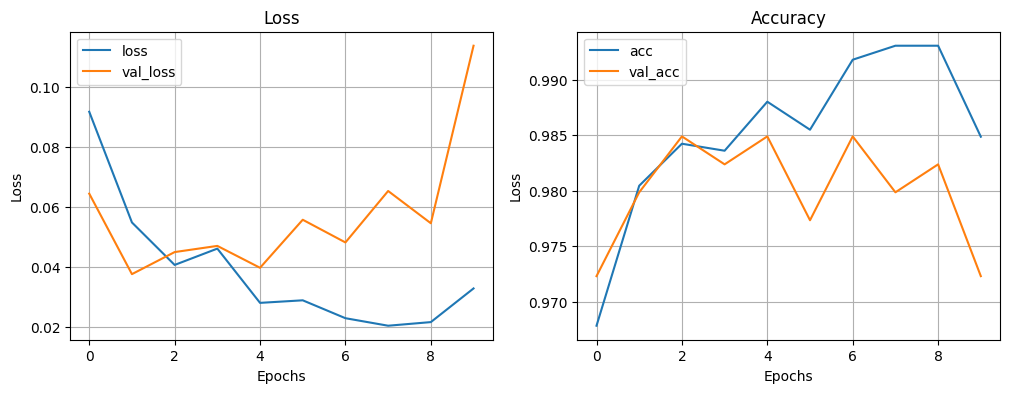

In [171]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="Loss")

plot_metrics(metrics)

16/16 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step


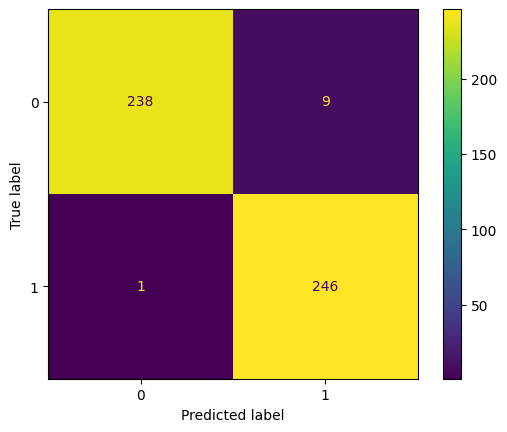

              precision    recall  f1-score   support

     Class 0       1.00      0.96      0.98       247
     Class 1       0.96      1.00      0.98       247

    accuracy                           0.98       494
   macro avg       0.98      0.98      0.98       494
weighted avg       0.98      0.98      0.98       494



In [172]:
y_pred_prob = model.predict(X_test_small)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_small, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

# Create classification report 
class_report = classification_report(y_test_small, y_pred, target_names=['Class 0', 'Class 1'])
print(class_report)